In [1]:
import pandas as pd

#converting from excel to csv file
pop=pd.read_excel('phl_population-2020_2025.xlsx')
pop.to_csv('phl_population-2020_2025.csv', index=False)
print('Done')

Done


In [2]:
import pandas as pd

#Loading both data sets                              #df1=pop  df2=eq
pop=pd.read_csv('phl_population-2020_2025.csv')
eq=pd.read_csv('phivolcs_earthquake_data.csv')

#Changing column name in pop from 'Municipality_City' to 'City'
pop.rename(columns={'Municipality_City': 'City'}, inplace=True)
#pop

#Changing column name in eq from 'Specific_Location' to 'City'
eq.rename(columns={'Specific_Location': 'City'}, inplace=True)
#eq

# Remove front/back ' ' spaces
pop['City'] = pop['City'].str.strip()
eq['City'] = eq['City'].str.strip()

# Convert all names to lowercase
pop['City'] = pop['City'].str.lower()
eq['City'] = eq['City'].str.lower()

# Convert timestamp to date
eq['Date_Time_PH'] = pd.to_datetime(eq['Date_Time_PH']).dt.date

#Converting 'Date'column data type from obj to datetime
eq['Date_Time_PH'] = pd.to_datetime(eq['Date_Time_PH'])

#renaming eq data set column name from 'Date_Time_PH' to 'Date'
eq.rename(columns={'Date_Time_PH': 'Date'}, inplace=True)

#converting data type for 'depth in km' column from object to numeric
eq["Depth_In_Km"] = pd.to_numeric(eq["Depth_In_Km"], errors="coerce")

# Keep only entries NOT between 2016 and 2019
eq_1=eq[~eq["Date"].dt.year.isin([2016, 2017, 2018, 2019])]

#Saving as csv files after renaming
pop_clean=pop.to_csv('Phl_Ppl-2020-2025_Clean.csv',index=False)
#pop

eq_clean=eq_1.to_csv('Earthquake_Data_Clean.csv',index=False)
#eq

print('Done')

Done


In [3]:
#Merging two data sets
import pandas as pd

#Calling to data sets
pop_clean=pd.read_csv('Phl_Ppl-2020-2025_Clean.csv')
eq_clean=pd.read_csv('Earthquake_Data_Clean.csv')

#merging two data sets on 'City' column
merged = pd.merge(pop_clean, eq_clean, on='City', how='inner')


#Saving into csv
merged.to_csv('Merged_DS.csv', index=False)
print('Done')
#merged

Done


In [4]:
#1. Data sets loaded
#2. Cleaned
#3. Mered
#4. Removed duplicates and min,max magnitude added for the same city on same year.
#5. We can remove latitude and logitude records as our primary aim is to find out earthquake records in the city.(one city 
#    has multiple latitude record which creates a confusion while working onn 4th point)
#6.

In [5]:
'''import pandas as pd

merged=pd.read_csv('Merged_DS.csv')
merged.head()

merged.dtypes'''

Region               object
Region_pcode         object
Province             object
Province_pcode       object
City                 object
Mun_Pcode            object
July2020              int64
July2021              int64
July2022              int64
July2023              int64
July2024              int64
July2025              int64
Date                 object
Latitude            float64
Longitude           float64
Depth_In_Km         float64
Magnitude           float64
Location             object
General_Location     object
dtype: object

In [17]:
'''import pandas as pd

merged = pd.read_csv("Merged_DS.csv")

merged['Date'] = pd.to_datetime(merged['Date'])

# Extract month and year for grouping
merged['year_week'] = merged['Date'].dt.to_period('W')

# Group by month and aggregate
week_summary = merged.groupby('year_week').agg(
    min_magnitude=('Magnitude', 'min'),
    max_magnitude=('Magnitude', 'max'),
    total_events=('Magnitude', 'count')
).reset_index()

print(week_summary)

week_summary.to_csv('Week_Stats.csv',index=False)
week_summary.info()'''

                 year_week  min_magnitude  max_magnitude  total_events
0    2019-12-30/2020-01-05            1.6            4.3           146
1    2020-01-06/2020-01-12            1.2            5.4           326
2    2020-01-13/2020-01-19            1.2            4.6          1134
3    2020-01-20/2020-01-26            1.5            4.6           371
4    2020-01-27/2020-02-02            1.4            4.9           245
..                     ...            ...            ...           ...
301  2025-10-06/2025-10-12            1.0            7.4          1648
302  2025-10-13/2025-10-19            1.2            6.0          1759
303  2025-10-20/2025-10-26            1.2            5.7          1418
304  2025-10-27/2025-11-02            1.3            5.0          1225
305  2025-11-03/2025-11-09            1.2            5.5           136

[306 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column         

In [32]:
import pandas as pd

# ---------------------------------------------
# 1. Load the merged file
# ---------------------------------------------
merged = pd.read_csv("Merged_DS.csv")
#-------------------------------------
merged['Date'] = pd.to_datetime(merged['Date'])

# Extract month and year for grouping
merged['year'] = merged['Date'].dt.to_period('Y')


# ---------------------------------------------
# 2. Standardize column names
# ---------------------------------------------
merged.columns = [c.strip().lower() for c in merged.columns]

# ---------------------------------------------
# 3. Clean city names
# ---------------------------------------------
#df['city'] = df['city'].astype(str).str.lower().str.strip()

# ---------------------------------------------
# 4. Extract date-only (remove timestamp)
# ---------------------------------------------
#date_col = [c for c in df.columns if "date" in c][0]
#df['date_only'] = pd.to_datetime(df[date_col]).dt.date

# ---------------------------------------------
# 5. Group by city + date (min/max/frequency)
# ---------------------------------------------
yearly_stats = merged.groupby(['city', 'year']).agg(
    min_mag=('magnitude', 'min'),
    max_mag=('magnitude', 'max'),
    frequency=('magnitude', 'count')
).reset_index()

# ---------------------------------------------
# 6. Merge daily stats back into merged file
# ---------------------------------------------
final_df = pd.merge(yearly_stats,merged.drop_duplicates(subset=['city']),  # add population + region only once
    on='city',
    how='left'
)

# ---------------------------------------------
# 7. Save output
# ---------------------------------------------


final_df = final_df.drop(columns=['region','region_pcode','province_pcode','mun_pcode','province','latitude','longitude','depth_in_km','magnitude','location','general_location','date','year_y'])
final_df.to_csv("year_stats.csv", index=False)
final_df.head()

,city,year_x,min_mag,max_mag,frequency,july2020,july2021,july2022,july2023,july2024,july2025
0,abra de ilog,2020,1.4,4.8,121,32596,32801,32986,33151,33297,33423
1,abra de ilog,2021,1.5,5.8,92,32596,32801,32986,33151,33297,33423
2,abra de ilog,2022,1.5,5.3,109,32596,32801,32986,33151,33297,33423
3,abra de ilog,2023,1.3,5.1,125,32596,32801,32986,33151,33297,33423
4,abra de ilog,2024,1.4,4.9,134,32596,32801,32986,33151,33297,33423


In [35]:
# Removing extra population columns and adding one column for population

import pandas as pd

# Load the merged dataset
final_df = pd.read_csv("year_stats.csv")

# Standardize column names (optional but useful)
final_df.columns = [c.strip().lower() for c in final_df.columns]

# Rename the year column if needed
if "year_x" in final_df.columns:
    final_df = final_df.rename(columns={"year_x": "year"})

# Map each year to the correct population column
population_map = {
    2020: "july2020",
    2021: "july2021",
    2022: "july2022",
    2023: "july2023",
    2024: "july2024",
    2025: "july2025"
}

# Function to fetch the correct population value
def assign_population(row):
    year = int(row["year"])
    if year in population_map:
        pop_col = population_map[year]
        return row[pop_col]
    return None

# Create the population column
final_df["population"] = final_df.apply(assign_population, axis=1)

#Drop Extra columns
final_df = final_df.drop(columns=["july2020","july2021","july2022","july2023","july2024","july2025"])

# Save the output
final_df.to_csv("Final_Data.csv", index=False)

print("Population column generated successfully!")

Population column generated successfully!


In [37]:
#Hypothesis Test

import pandas as pd
from scipy.stats import pearsonr

# Load your merged dataset
final_df = pd.read_csv("Final_Data.csv")  

# Keep only numeric rows (cleaning)
df_clean = final_df[['population', 'frequency']].dropna()

# Pearson correlation test
corr, p_value = pearsonr(df_clean['population'], df_clean['frequency'])

print("Correlation:", corr)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Bigger cities DO have significantly more earthquakes (reject H0).")
else:
    print("Result: No significant evidence that bigger cities have more earthquakes (fail to reject H0).")


Correlation: -0.02679473057428194
P-value: 0.07783619262538151
Result: No significant evidence that bigger cities have more earthquakes (fail to reject H0).


In [41]:
import pandas as pd
final_df = pd.read_csv("Final_Data.csv")  
final_df.describe()

,year,min_mag,max_mag,frequency,population
count,4332.000000,4332.000000,4332.000000,4332.000000,4.332000e+03
mean,2022.619575,1.863135,3.028163,29.461219,4.571030e+04
std,1.711942,0.481537,0.964000,143.977499,5.146919e+04
min,2020.000000,1.000000,1.100000,1.000000,1.345000e+03
25%,2021.000000,1.500000,2.300000,2.000000,2.077025e+04
50%,2023.000000,1.800000,2.900000,4.000000,3.512850e+04
75%,2024.000000,2.100000,3.600000,14.000000,5.694350e+04
max,2025.000000,5.100000,7.500000,4680.000000,1.827910e+06


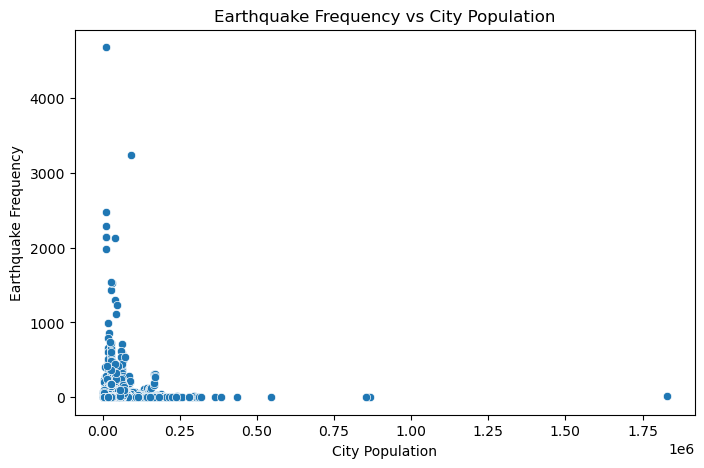

In [3]:
#Scatter plot. 
 # This shows how earthquake frequency changes with city population.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_df = pd.read_csv("Final_Data.csv")  
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='population', y='frequency', data=final_df)
plt.title("Earthquake Frequency vs City Population")
plt.xlabel("City Population")
plt.ylabel("Earthquake Frequency")
plt.show()

In [ ]:
Explanation # explanation for class:

Each dot = a city

X-axis = city population

Y-axis = number of earthquakes

Shows if bigger cities have more earthquakes

In your data, the points are scattered → almost no trend, which matches the correlation (r ≈ –0.0268)

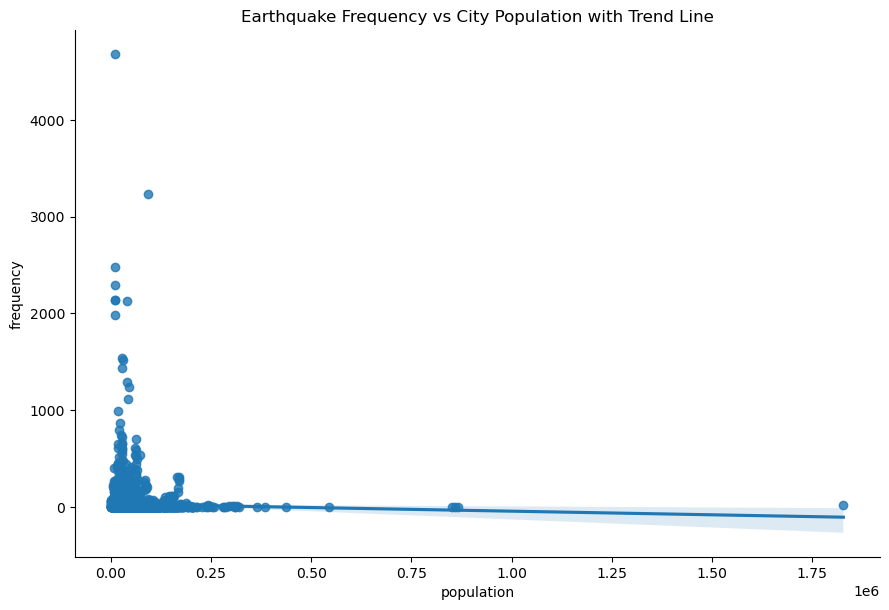

In [5]:
#Scatter Plot with Trend Line 

#. This adds a line to see the overall trend between the two variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_df = pd.read_csv("Final_Data.csv")  


sns.lmplot(x='population', y='frequency', data=final_df, height=6, aspect=1.5)
plt.title("Earthquake Frequency vs City Population with Trend Line")
plt.show()

In [ ]:
# Explanation for class:

#Line shows the direction of the relationship

# In your case, the line is almost flat, confirming that population has little to no effect on earthquake frequency

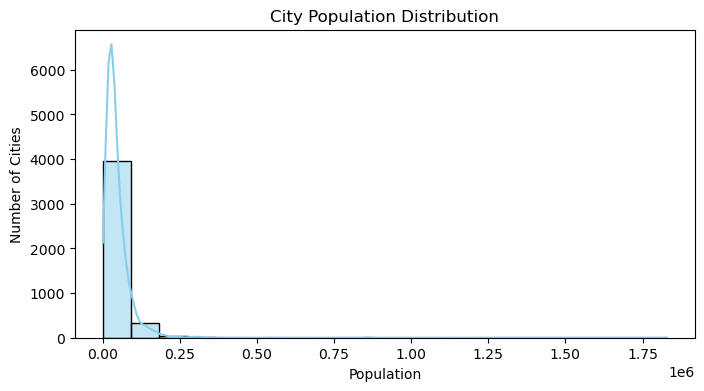

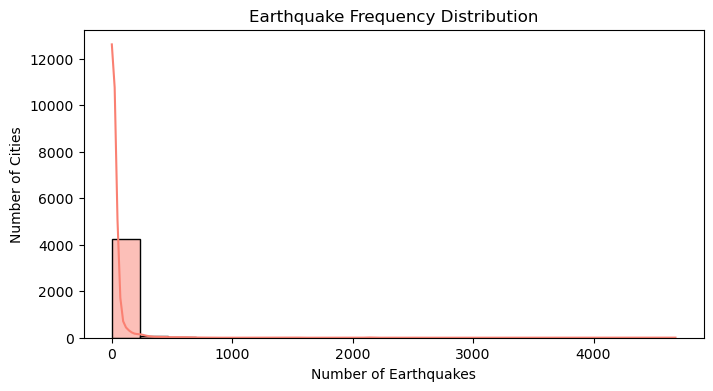

In [6]:
# Histogram.  This helps you see how the population and earthquake frequency are spread across cities.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_df = pd.read_csv("Final_Data.csv")  



# Population distribution
plt.figure(figsize=(8,4))
sns.histplot(final_df['population'], bins=20, kde=True, color='skyblue')
plt.title("City Population Distribution")
plt.xlabel("Population")
plt.ylabel("Number of Cities")
plt.show()

# Earthquake frequency distribution
plt.figure(figsize=(8,4))
sns.histplot(final_df['frequency'], bins=20, kde=True, color='salmon')
plt.title("Earthquake Frequency Distribution")
plt.xlabel("Number of Earthquakes")
plt.ylabel("Number of Cities")
plt.show()

In [ ]:
# Explanation for class:

# Population histogram: shows most cities have smaller populations, few are very large

# Earthquake histogram: shows how many cities had 0, 1, or multiple earthquakes 

# Helps understand the data spread and why correlation is weak

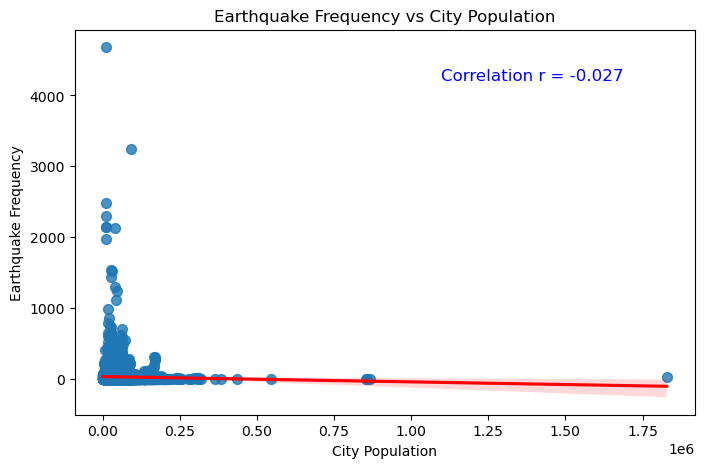

In [7]:
#. Scatter Plot with Correlation Coefficient Annotated

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

final_df = pd.read_csv("Final_Data.csv")  


# Calculate correlation
corr, p_value = pearsonr(final_df['population'], final_df['frequency'])

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x='population', y='frequency', data=final_df, scatter_kws={'s':50}, line_kws={'color':'red'})

# Add correlation coefficient text
plt.text(x=final_df['population'].max()*0.6, 
         y=final_df['frequency'].max()*0.9, 
         s=f"Correlation r = {corr:.3f}", 
         fontsize=12, color='blue')

plt.title("Earthquake Frequency vs City Population")
plt.xlabel("City Population")
plt.ylabel("Earthquake Frequency")
plt.show()

In [ ]:
'''Scatter Plot with Correlation Coefficient Annotated'''

'''Explanation for class

Red line = trend line (regression line)

Blue text = correlation coefficient (r = –0.0268)

Scatter points = cities

Visually shows almost no trend, confirming your previous results

Makes your slide clear and professional'''

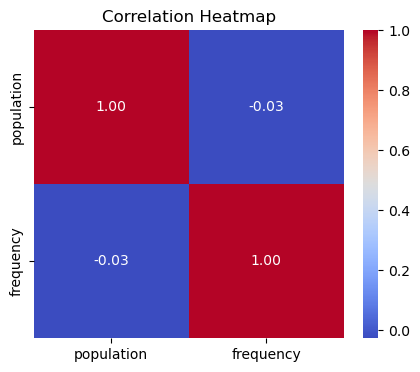

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


final_df = pd.read_csv("Final_Data.csv")  
# Compute correlation matrix
corr_matrix = final_df[['population', 'frequency']].corr()

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()